## Senitiment Analysis of Flipkart Review Data using VADER (Valence Aware Dictionary and sEntiment Reasoner)

In [1]:
#Adding required libraries
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('flipkart_product.csv', encoding= 'unicode_escape')

In [39]:
df.head(15)

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product
5,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,The cooler is really fantastic and provides go...
6,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Highly recommended,Very good product
7,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Nice,Very nice
8,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Unsatisfactory,Very bad cooler
9,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",4,Worth the money,Very good


###### Cleaning the Data

In [4]:
df.isnull().sum()
df.shape

(189874, 5)

In [5]:
df.isna().sum().sort_values(ascending=False)

Summary        14
Review          4
Price           1
Rate            1
ProductName     0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isna().sum().sort_values(ascending=False)

ProductName    0
Price          0
Rate           0
Review         0
Summary        0
dtype: int64

In [15]:
df.dtypes

ProductName    object
Price          object
Rate           object
Review         object
Summary        object
dtype: object

In [16]:
#converting Object Data type of Rate to 
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce').fillna(0).astype(int)

In [17]:
df.dtypes

ProductName    object
Price          object
Rate            int64
Review         object
Summary        object
dtype: object

###### Analyzing 

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histogram(data, column_name, bins=20, kde=True):
    """
    Create and display a histogram for a specified column in a Pandas DataFrame.

    Parameters:
        data (DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot.
        bins (int, optional): The number of bins for the histogram. Default is 20.
        kde (bool, optional): Whether to include a Kernel Density Estimate curve. Default is True.
    """
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))

    sns.histplot(data=data, x=column_name, bins=bins, kde=kde)

    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

    # Calculate and display mean and median as annotations
    mean_value = data[column_name].mean()
    median_value = data[column_name].median()

    plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

    # Add a legend
    plt.legend()

    plt.show()

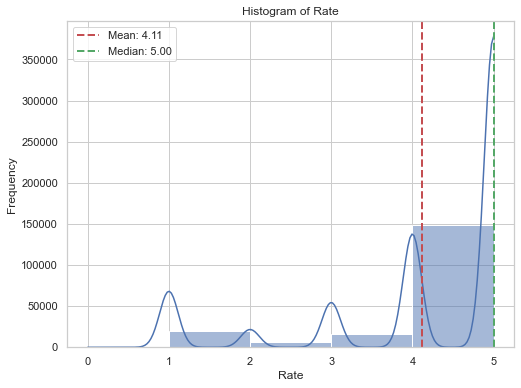

In [21]:
plot_histogram(df, 'Rate', bins=5, kde=True)

In [28]:
df.isna().sum().sort_values(ascending=False)

ProductName    0
Price          0
Rate           0
Review         0
Summary        0
dtype: int64

#### Implementing Sentiment Analysis using VADER in Review Column

In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd  # Import pandas library

# download VADER lexicon and NLTK stopwords
nltk.download('vader_lexicon')
nltk.download('stopwords')

# initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Threshold', 'Positive Reviews', 'Negative Reviews', 'Neutral Reviews'])

# perform sensitivity analysis for different thresholds
thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
for threshold in thresholds:
    pos_count = 0
    neg_count = 0
    neu_count = 0
    for review in df['Review']:
        scores = sid.polarity_scores(review)
        if scores['compound'] >= threshold:
            pos_count += 1
        elif scores['compound'] <= -threshold:
            neg_count += 1
        else:
            neu_count += 1
    
    # Append the results for the current threshold to the result_df DataFrame
    result_df = result_df.append({'Threshold': threshold,
                                  'Positive Reviews': pos_count,
                                  'Negative Reviews': neg_count,
                                  'Neutral Reviews': neu_count},
                                 ignore_index=True)
    
    print(f'Threshold: {threshold}\nPositive reviews: {pos_count}\nNegative reviews: {neg_count}\nNeutral reviews: {neu_count}')
    
# Print the DataFrame with the results
print(result_df)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ashutoshkumar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashutoshkumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Threshold: 0.1
Positive reviews: 130778
Negative reviews: 14625
Neutral reviews: 44454
Threshold: 0.3
Positive reviews: 114214
Negative reviews: 13483
Neutral reviews: 62160
Threshold: 0.5
Positive reviews: 70344
Negative reviews: 6909
Neutral reviews: 112604
Threshold: 0.7
Positive reviews: 3562
Negative reviews: 17
Neutral reviews: 186278
Threshold: 0.9
Positive reviews: 2
Negative reviews: 1
Neutral reviews: 189854
   Threshold  Positive Reviews  Negative Reviews  Neutral Reviews
0        0.1          130778.0           14625.0          44454.0
1        0.3          114214.0           13483.0          62160.0
2        0.5           70344.0            6909.0         112604.0
3        0.7            3562.0              17.0         186278.0
4        0.9               2.0               1.0         189854.0


### The threshold in sentiment analysis is a crucial parameter that determines the sensitivity of sentiment classification.

#### - A low threshold (e.g., 0.1) makes the analysis very sensitive, classifying even subtle sentiments.
#### - A medium threshold (e.g., 0.5) balances sensitivity and specificity, capturing stronger sentiments.
#### - A high threshold (e.g., 0.9) makes the analysis strict, categorizing only very strong sentiments.

### By analyzing at different thresholds, we gain insights into how the choice of threshold impacts sentiment classification.


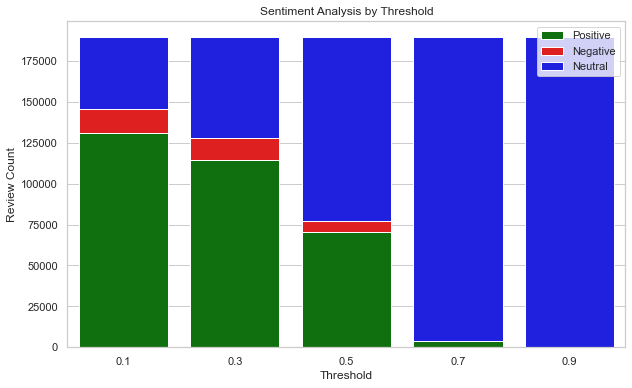

In [34]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot for positive, negative, and neutral reviews
plt.figure(figsize=(10, 6))
sns.barplot(x='Threshold', y='Positive Reviews', data=result_df, color='green', label='Positive')
sns.barplot(x='Threshold', y='Negative Reviews', data=result_df, color='red', label='Negative', bottom=result_df['Positive Reviews'])
sns.barplot(x='Threshold', y='Neutral Reviews', data=result_df, color='blue', label='Neutral',
            bottom=result_df['Positive Reviews'] + result_df['Negative Reviews'])

# Customize the plot
plt.xlabel('Threshold')
plt.ylabel('Review Count')
plt.title('Sentiment Analysis by Threshold')
plt.legend()

# Show the plot
plt.show()


In [106]:
!pip install wordcloud

     |████████████████████████████████| 160 kB 559 kB/s eta 0:00:01
You should consider upgrading via the '/Users/ashutoshkumar/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


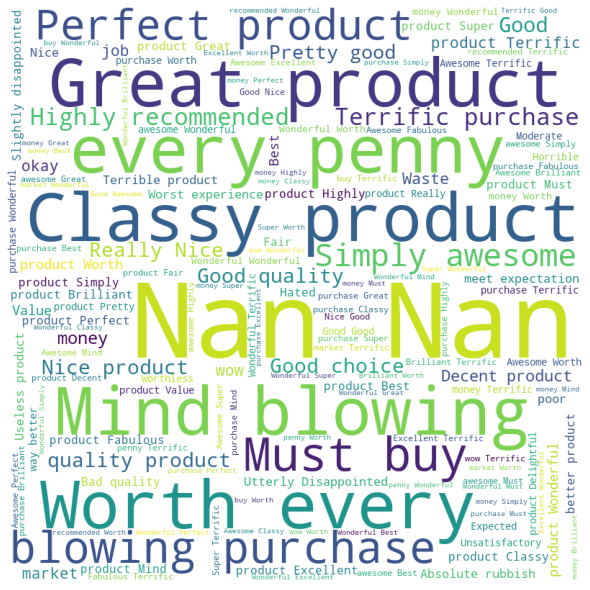

In [107]:
from wordcloud import WordCloud

# Concatenate all reviews into a single string
all_reviews = ' '.join(df['Review'].tolist())

# Generate a word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(all_reviews)

# Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

###### As per my recomendation I'll go for Thrushold 0.1 and conclude that the most of the sentiments were positive and overall review is. good


#### Following will be the stats as per Thrushold 0.1
###### Positive reviews: 130778
###### Negative reviews: 14625
###### Neutral reviews: 44454

### One thing was common in every thrushold that the negative reviews are very less which means the product performed very well